In [31]:
import matplotlib.pyplot as plt
import pickle
from skimage.transform import rotate
from scipy import ndimage
from skimage.util import img_as_ubyte
from joblib import Parallel, delayed
from sklearn.ensemble.forest import _generate_unsampled_indices
from sklearn.ensemble.forest import _generate_sample_indices
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from itertools import product
import seaborn as sns

#import sys
#sys.path.append("../lifelong_learner")
#from lf import LF

%matplotlib inline

In [32]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [49]:
task = range(0,10,1)
ntrees = range(10,300,10)

ntask = len(task)
n_ntrees = len(ntrees)

err = np.zeros((ntask,n_ntrees),dtype=float)

for t in task:
    for count,tree in enumerate(ntrees):
        filename = '../result/task_'+str(t)+'__'+str(tree)
        err[t-1,count] = 1 - unpickle(filename)
        


In [50]:
err

array([[0.34966667, 0.38516667, 0.40033333, 0.40366667, 0.40983333,
        0.41233333, 0.41333333, 0.4175    , 0.42066667, 0.41966667,
        0.422     , 0.422     , 0.425     , 0.42266667, 0.4215    ,
        0.42216667, 0.41966667, 0.4205    , 0.42283333, 0.424     ,
        0.4245    , 0.42283333, 0.4235    , 0.4245    , 0.42483333,
        0.4255    , 0.42333333, 0.42416667, 0.42583333],
       [0.4635    , 0.4865    , 0.50116667, 0.50316667, 0.503     ,
        0.50716667, 0.50983333, 0.51016667, 0.50783333, 0.50866667,
        0.51066667, 0.51216667, 0.513     , 0.51566667, 0.517     ,
        0.517     , 0.5165    , 0.51883333, 0.51933333, 0.52116667,
        0.52      , 0.5195    , 0.5195    , 0.519     , 0.518     ,
        0.5205    , 0.5205    , 0.52133333, 0.52016667],
       [0.401     , 0.42983333, 0.44416667, 0.45216667, 0.45266667,
        0.455     , 0.459     , 0.46116667, 0.46033333, 0.46466667,
        0.46383333, 0.46683333, 0.469     , 0.4685    , 0.472     ,
  

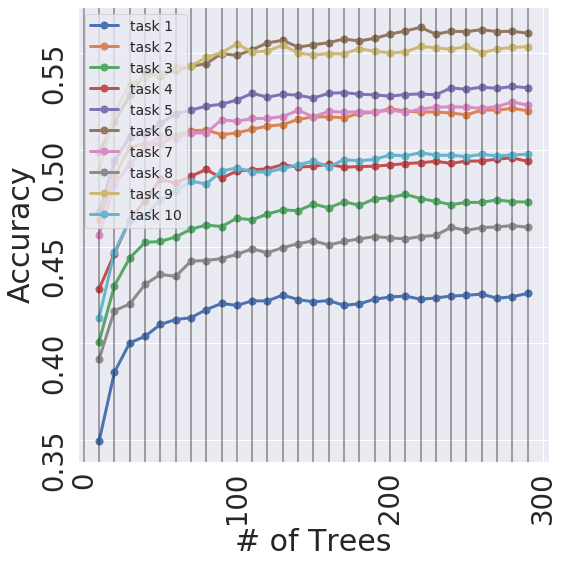

In [51]:
sns.set()

fig, ax = plt.subplots(1,1, figsize=(8,8))

for i in range(10):
    ax.plot(ntrees, err[i,:], marker='.', label = 'task '+str(i+1), markersize=14, linewidth=3)

#ax.set_xticks([100,1000,2000,3000,4000,5000])
#ax.set_yticks([0.9, 1.0, 1.1, 1.2])
#ax.set_ylim(0.89, 1.21)
ax.tick_params(labelsize=27.5,rotation=90)
ax.legend(loc='upper left', fontsize=14)
# ax[0].legend(algos, bbox_to_anchor=(1.2, -.2), loc=2, borderaxespad=0)

ax.set_ylabel('Accuracy', fontsize=30)
ax.set_xlabel('# of Trees', fontsize=30)

#ax.grid(axis='x')

for i in range(0,300,10):
    ax.axvline(x = i, linewidth=1.5,alpha=0.5, color='k')

#ax.axvline(x = 3500, linewidth=3, color='k')

#ax.hlines(0.422, 1,5000, colors='k', linestyles='dashed',linewidth=2)

plt.tight_layout()


plt.savefig('/data/Jayanta/tasks.png',dpi=500)